# Modelo 1 

In [8]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, cross_val_score, StratifiedKFold
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, roc_curve, auc, classification_report
from sklearn.preprocessing import LabelEncoder

                                              sha256  labels  \
0  5c18291c481a192ed5003084dab2d8a117fd3736359218...       0   
1  4683faf3da550ffb594cf5513c4cbb34f64df85f27fd1c...       0   
2  9a0aea1c7290031d7c3429d0e921f107282cc6eab854ee...       0   
3  e0f3e4d5f50afd9c31e51dd9941c5a52d57c7c524f5d11...       0   
4  ec2b6d29992f13e74015ff0b129150b4afae15c593e4b7...       0   

                     0                        1                   2  \
0         LdrUnloadDll           CoUninitialize          NtQueryKey   
1         NtOpenMutant      GetForegroundWindow          NtQueryKey   
2  GetForegroundWindow              DrawTextExW       GetSystemInfo   
3      NtQueryValueKey             LdrUnloadDll  GlobalMemoryStatus   
4         LdrUnloadDll  GetSystemTimeAsFileTime           NtOpenKey   

                   3                            4                       5  \
0  NtDuplicateObject            GetShortPathNameW           GetSystemInfo   
1        DrawTextExW         NtSet

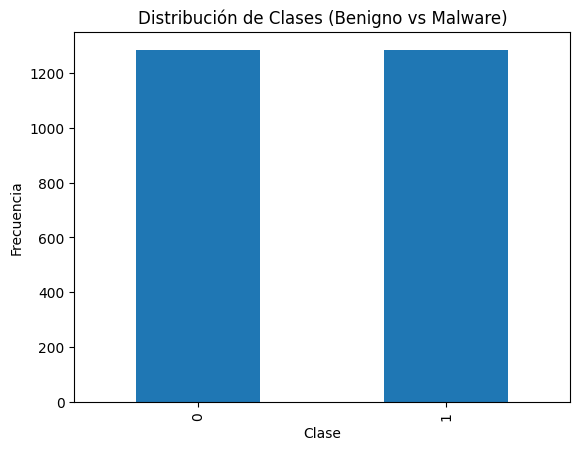

In [9]:
# Cargar los datos
data = pd.read_csv('Data.csv')
print(data.head())

# Exploración de datos
data['labels'].value_counts().plot(kind='bar')
plt.title("Distribución de Clases (Benigno vs Malware)")
plt.xlabel("Clase")
plt.ylabel("Frecuencia")
plt.show()

# Preprocesamiento: convertir llamadas a API en texto separado por espacio
data['api_calls'] = data.iloc[:, 2:].astype(str).apply(lambda x: ' '.join(x.dropna()), axis=1)
X = data['api_calls']
y = data['labels']

# División de datos en entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)

In [ ]:
# Ingeniería de Características: TF-IDF
vectorizer = TfidfVectorizer()
X_train_vec = vectorizer.fit_transform(X_train)
X_test_vec = vectorizer.transform(X_test)

# Entrenamiento del modelo
model = MultinomialNB()
model.fit(X_train_vec, y_train)

# Validación cruzada k=10
kfold = StratifiedKFold(n_splits=10, shuffle=True, random_state=42)
cross_val_scores = cross_val_score(model, X_train_vec, y_train, cv=kfold, scoring='accuracy')
print(f'Validación cruzada (Accuracy promedio): {np.mean(cross_val_scores):.4f}')

Validación cruzada (Accuracy promedio): 0.8244


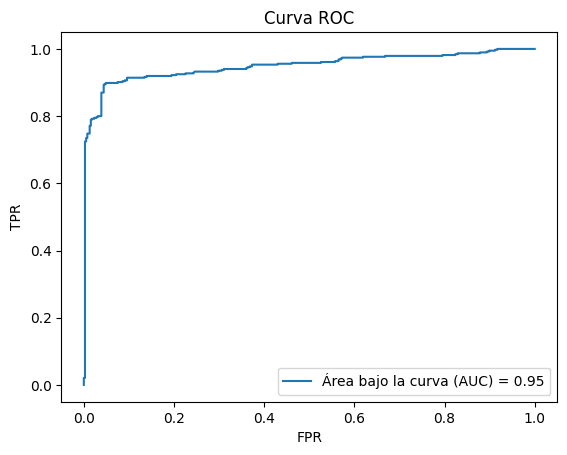

In [11]:

# Curva ROC
y_prob = model.predict_proba(X_test_vec)[:, 1]
fpr, tpr, _ = roc_curve(y_test, y_prob)
roc_auc = auc(fpr, tpr)
plt.figure()
plt.plot(fpr, tpr, label=f'Área bajo la curva (AUC) = {roc_auc:.2f}')
plt.xlabel('FPR')
plt.ylabel('TPR')
plt.title('Curva ROC')
plt.legend()
plt.show()

# Modelo 2

In [9]:
!pip install ipykernel


[notice] A new release of pip is available: 24.0 -> 25.0.1
[notice] To update, run: C:\Users\rebec\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip


In [ ]:
!python -m ipykernel install --user --name tensorflow_env --display-name "Python 3.9 (tensorflow)"

!pip install tensorflow


Installed kernelspec tensorflow_env in C:\Users\rebec\AppData\Roaming\jupyter\kernels\tensorflow_env
  Using cached typing_extensions-4.5.0-py3-none-any.whl.metadata (8.5 kB)
Using cached typing_extensions-4.5.0-py3-none-any.whl (27 kB)
  Attempting uninstall: typing-extensions
    Found existing installation: typing_extensions 4.12.2
    Uninstalling typing_extensions-4.12.2:
      Successfully uninstalled typing_extensions-4.12.2


ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
ipython 8.32.0 requires typing_extensions>=4.6; python_version < "3.12", but you have typing-extensions 4.5.0 which is incompatible.
pydantic 2.10.6 requires typing-extensions>=4.12.2, but you have typing-extensions 4.5.0 which is incompatible.
pydantic-core 2.27.2 requires typing-extensions!=4.7.0,>=4.6.0, but you have typing-extensions 4.5.0 which is incompatible.

[notice] A new release of pip is available: 24.0 -> 25.0.1
[notice] To update, run: C:\Users\rebec\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip


In [1]:
import tensorflow as tf
print(tf.__version__)


ModuleNotFoundError: No module named 'tensorflow'

In [2]:
from tensorflow.keras.models import Sequential

ModuleNotFoundError: No module named 'tensorflow'

In [ ]:
# Cargar los datos
data = pd.read_csv('Data.csv')
print(data.head())

# Exploración de datos
data['labels'].value_counts().plot(kind='bar')
plt.title("Distribución de Clases (Benigno vs Malware)")
plt.xlabel("Clase")
plt.ylabel("Frecuencia")
plt.show()

# Preprocesamiento: convertir llamadas a API en texto separado por espacio
data['api_calls'] = data.iloc[:, 2:].astype(str).apply(lambda x: ' '.join(x.dropna()), axis=1)
X = data['api_calls']
y = data['labels']

In [ ]:
# Generación de embeddings usando un modelo de NLP de Gemini (simulado con Sentence-Transformers)
model_nlp = SentenceTransformer('paraphrase-MiniLM-L6-v2')  # Reemplazar con embeddings de Gemini si están disponibles
X_embeddings = model_nlp.encode(X.tolist(), convert_to_numpy=True)

# División de datos en entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X_embeddings, y, test_size=0.3, random_state=42, stratify=y)

# Definición de la Red Neuronal
model_nn = Sequential([
    Input(shape=(X_train.shape[1],)),
    Dense(128, activation='relu'),
    Dropout(0.3),
    Dense(64, activation='relu'),
    Dropout(0.3),
    Dense(1, activation='sigmoid')
])

model_nn.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [ ]:
# Entrenamiento del modelo
history = model_nn.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=20, batch_size=32, verbose=1)

# Evaluación del modelo
y_pred_prob = model_nn.predict(X_test).flatten()
y_pred = (y_pred_prob > 0.5).astype(int)
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
print(f'Accuracy: {accuracy:.4f}')
print(f'Precision: {precision:.4f}')
print(f'Recall: {recall:.4f}')
print(classification_report(y_test, y_pred))

# Curva ROC
fpr, tpr, _ = roc_curve(y_test, y_pred_prob)
roc_auc = auc(fpr, tpr)
plt.figure()
plt.plot(fpr, tpr, label=f'Área bajo la curva (AUC) = {roc_auc:.2f}')
plt.xlabel('FPR')
plt.ylabel('TPR')
plt.title('Curva ROC')
plt.legend()
plt.show()
